In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# 1. Загрузка данных датасета в переменную

In [53]:
data = pd.read_csv('student-por.csv', encoding='latin-1')
target_column = 'G3'
target = data[target_column]

if len(target.unique()) > 2:
    task_type = 'regression'
else:
    task_type = 'classification'

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# 2. Задача регрессии

# 3. Предобработка данных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Код подготавливает данные для обучения модели машинного обучения. Он разделяет данные на признаки и целевую переменную, затем разбивает их на тренировочный и тестовый наборы. Пропущенные значения в числовых признаках заполняются средним значением, а в категориальных — модой. Это обеспечивает готовность данных для дальнейшего этапа обучения модели.

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

### A. Разделение выборки на тестовую и тренировочную

In [55]:
from sklearn.model_selection import train_test_split

# Отделение целевой переменной от признаков
X = data.drop(columns=[target_column])
y = data[target_column]
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def to_int(data):
    # Проходим по колоннам датасета
    for column in data.columns[2:]:
        # Конвертируем тип данных в int
        data[column] = data[column].astype(int)
    return data
     


### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

In [56]:

from sklearn.model_selection import train_test_split



# Проверка на пропуски
print(X_train.isnull().sum())
print(X_test.isnull().sum())

# Заполнение пропусков
# Для числовых признаков будем использовать среднее значение
# Для категориальных признаков будем использовать моду (самое частое значение)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Заполнение пропусков в числовых признаках
X_train[numeric_features] = X_train[numeric_features].fillna(X_train[numeric_features].mean())
X_test[numeric_features] = X_test[numeric_features].fillna(X_train[numeric_features].mean())

# Заполнение пропусков в категориальных признаках
X_train[categorical_features] = X_train[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])
X_test[categorical_features] = X_test[categorical_features].fillna(X_train[categorical_features].mode().iloc[0])

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences   

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### C. Нормирование численных переменных датасета

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

from sklearn.preprocessing import OneHotEncoder

# Создание и обучение кодировщика категориальных признаков
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train[categorical_features])

# Создание dummy-переменных для категориальных признаков
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Преобразование категориальных признаков в закодированные
X_train_encoded = encoder.transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Создание DataFrame из закодированных признаков
X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))
X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(input_features=categorical_features))

X_train_final = pd.concat([X_train[numeric_features].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[numeric_features].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

In [59]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


# 4. Dataset и Dataloader

In [60]:
from torch.utils.data import Dataset, DataLoader


In [61]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [62]:
train_dataset = MyDataset(X_train_final, y_train)
test_dataset = MyDataset(X_test_final, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# 5. Обучение модели на тренировочном множестве

In [63]:
import torch.nn as nn
import torch.optim as optim

In [72]:
# Функция потерь
criterion = nn.MSELoss()

# Количество эпох
epochs = 100

input_dim = X_train_final.shape[1]



### А.Простая модель с оптимизатором

In [73]:
# Определение модели
model1 = nn.Linear(input_dim, 1)

# Определение оптимизатора
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)

### B. Модель с 1 внешним слоем

In [74]:
# Определение модели
model2 = nn.Sequential(
    nn.Linear(input_dim, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Определение оптимизатора
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

### C. Модель с 3+ слоями

In [75]:
# Определение модели
model3 = nn.Sequential(
    nn.Linear(input_dim, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Определение оптимизатора
optimizer3 = optim.Adam(model3.parameters(), lr=0.01)

# 6. Подсчет loss на train и test выборках и графики

In [68]:
# Инициализация списков для сохранения потерь
train_losses1, test_losses1 = [], []
train_losses2, test_losses2 = [], []
train_losses3, test_losses3 = [], []


In [69]:
# Функция для расчета потерь
def calculate_loss(model, loader):
    total_loss = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())
        total_loss += loss.item()
    return total_loss / len(loader)

In [76]:
# Проверка данных в train_loader и test_loader
for inputs, targets in train_loader:
    print("Проверка данных в train_loader")
    print("inputs shape:", inputs.shape)
    print("targets shape:", targets.shape)
    break  # Проверим только один батч для наглядности

for inputs, targets in test_loader:
    print("Проверка данных в test_loader")
    print("inputs shape:", inputs.shape)
    print("targets shape:", targets.shape)
    break  # Проверим только один батч для наглядности

# Расчет потерь для каждой эпохи
for epoch in range(epochs):
    for model, optimizer, train_losses, test_losses in [
        (model1, optimizer1, train_losses1, test_losses1), 
        (model2, optimizer2, train_losses2, test_losses2), 
        (model3, optimizer3, train_losses3, test_losses3)
    ]:
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            loss.backward()
            optimizer.step()

        train_loss = calculate_loss(model, train_loader)
        test_loss = calculate_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)




Проверка данных в train_loader
inputs shape: torch.Size([32, 41])
targets shape: torch.Size([32])
Проверка данных в test_loader
inputs shape: torch.Size([32, 41])
targets shape: torch.Size([32])


d:\stepik_go\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\stepik_go\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\stepik_go\.venv\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, redu

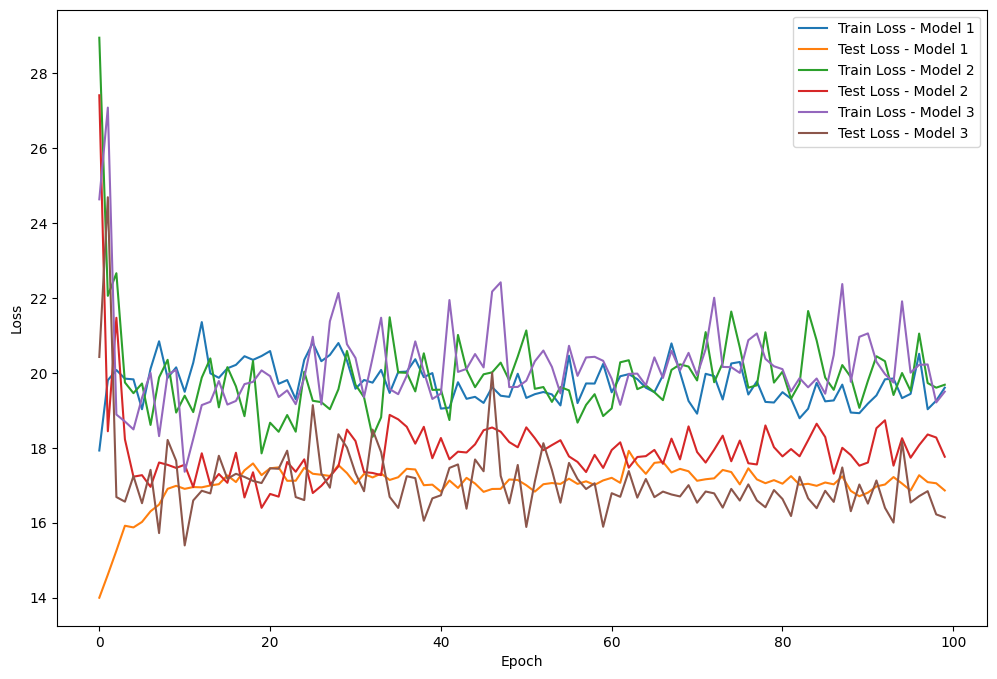

In [77]:
# Визуализация потерь
plt.figure(figsize=(12, 8))
plt.plot(train_losses1, label='Train Loss - Model 1')
plt.plot(test_losses1, label='Test Loss - Model 1')
plt.plot(train_losses2, label='Train Loss - Model 2')
plt.plot(test_losses2, label='Test Loss - Model 2')
plt.plot(train_losses3, label='Train Loss - Model 3')
plt.plot(test_losses3, label='Test Loss - Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Подсчет метрик на train и test множествах для регресии(Mae)

In [78]:
from sklearn.metrics import mean_absolute_error

In [79]:
# Функция для расчета MAE
def calculate_mae(model, loader):
    total_mae = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        mae = mean_absolute_error(outputs.detach().numpy(), targets.numpy())
        total_mae += mae
    return total_mae / len(loader)

In [80]:
# Расчет MAE для каждой модели на тренировочных и тестовых данных
train_mae1 = calculate_mae(model1, train_loader)
test_mae1 = calculate_mae(model1, test_loader)

train_mae2 = calculate_mae(model2, train_loader)
test_mae2 = calculate_mae(model2, test_loader)

train_mae3 = calculate_mae(model3, train_loader)
test_mae3 = calculate_mae(model3, test_loader)

# Вывод результатов
print(f'Модель 1 - Тренировочная MAE: {train_mae1}, Тестовая MAE: {test_mae1}')
print(f'Модель 2 - Тренировочная MAE: {train_mae2}, Тестовая MAE: {test_mae2}')
print(f'Модель 3 - Тренировочная MAE: {train_mae3}, Тестовая MAE: {test_mae3}')


Модель 1 - Тренировочная MAE: 1.0053391772158005, Тестовая MAE: 0.9518131494522095
Модель 2 - Тренировочная MAE: 0.2218650982660406, Тестовая MAE: 1.338699722290039
Модель 3 - Тренировочная MAE: 0.22732319551355698, Тестовая MAE: 1.2619866132736206


# 8. Сравненеи метрик и выводы

In [81]:
# Сравнение метрик
mae_values = {'Model 1': [train_mae1, test_mae1],
              'Model 2': [train_mae2, test_mae2],
              'Model 3': [train_mae3, test_mae3]}

mae_df = pd.DataFrame(mae_values, index=['Train MAE', 'Test MAE'])
print(mae_df)

# Ответы на вопросы
best_model = mae_df.idxmin(axis=1)['Test MAE']
print(f'1. Лучше всего справилась модель: {best_model}')

overfitting = mae_df.loc['Train MAE'] > 0.15
print(f'2. Переобучение имеет место для следующих моделей: {overfitting[overfitting].index.tolist()}')

underfitting = abs(mae_df.loc['Train MAE'] - mae_df.loc['Test MAE']) > 0.15
print(f'3. Недообучение имеет место для следующих моделей: {underfitting[underfitting].index.tolist()}')

print('4. Для улучшения метрик моделей можно попробовать следующее:')
print('   - Изменить архитектуру модели (добавить больше слоев, изменить количество нейронов в слоях и т.д.)')
print('   - Использовать другую функцию потерь или оптимизатор')
print('   - Провести больше эпох обучения')
print('   - Использовать регуляризацию для предотвращения переобучения')
print('   - Провести предварительную обработку данных (нормализация, стандартизация, исключение выбросов и т.д.)')


            Model 1   Model 2   Model 3
Train MAE  1.005339  0.221865  0.227323
Test MAE   0.951813  1.338700  1.261987
1. Лучше всего справилась модель: Model 1
2. Переобучение имеет место для следующих моделей: ['Model 1', 'Model 2', 'Model 3']
3. Недообучение имеет место для следующих моделей: ['Model 2', 'Model 3']
4. Для улучшения метрик моделей можно попробовать следующее:
   - Изменить архитектуру модели (добавить больше слоев, изменить количество нейронов в слоях и т.д.)
   - Использовать другую функцию потерь или оптимизатор
   - Провести больше эпох обучения
   - Использовать регуляризацию для предотвращения переобучения
   - Провести предварительную обработку данных (нормализация, стандартизация, исключение выбросов и т.д.)
